In [11]:
import chardet

with open('/Users/senaiahderom/Documents/10Academy-course/notebooks/solar.csv', 'rb') as f:
    result = chardet.detect(f.read(10000))  # Read first 10,000 bytes
    print(result)


{'encoding': 'CP949', 'confidence': 0.99, 'language': 'Korean'}


In [12]:
import pandas as pd

In [13]:
df = pd.read_csv('/Users/senaiahderom/Documents/10Academy-course/notebooks/solar.csv', 
                 parse_dates=['Timestamp'], 
                 encoding='ISO-8859-1')  # Replace with the detected encoding
print(df.info())


/var/folders/8d/kl24b_0s3gx0jhkqll61_jmm0000gn/T/ipykernel_8679/1389117926.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/senaiahderom/Documents/10Academy-course/notebooks/solar.csv',
/var/folders/8d/kl24b_0s3gx0jhkqll61_jmm0000gn/T/ipykernel_8679/1389117926.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('/Users/senaiahderom/Documents/10Academy-course/notebooks/solar.csv',


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525601 entries, 0 to 525600
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525601 non-null  object 
 1   GHI            525601 non-null  object 
 2   DNI            525601 non-null  object 
 3   DHI            525601 non-null  object 
 4   ModA           525601 non-null  object 
 5   ModB           525601 non-null  object 
 6   Tamb           525601 non-null  object 
 7   RH             525601 non-null  object 
 8   WS             525601 non-null  object 
 9   WSgust         525601 non-null  object 
 10  WSstdev        525601 non-null  object 
 11  WD             525601 non-null  object 
 12  WDstdev        525601 non-null  object 
 13  BP             525601 non-null  object 
 14  Cleaning       525601 non-null  object 
 15  Precipitation  525601 non-null  object 
 16  TModA          525601 non-null  object 
 17  TModB          525601 non-nul

In [14]:
print(df.head())
print(df.describe())


          Timestamp   GHI   DNI   DHI  ModA  ModB  Tamb    RH   WS WSgust  \
0  yyyy-mm-dd hh:mm  W/m²  W/m²  W/m²  W/m²  W/m²    °C     %  m/s    m/s   
1  2022-08-09 00:01  -5.6  -0.1  -5.7     0     0  23.1  98.3  0.9    1.3   
2  2022-08-09 00:02  -5.5  -0.1  -5.6     0     0  23.1  98.3  0.9    1.1   
3  2022-08-09 00:03  -5.5  -0.1  -5.6     0     0  23.2  98.4  0.1    1.1   
4  2022-08-09 00:04  -5.5  -0.1  -5.6     0     0  23.2  98.4  0.1    1.1   

  WSstdev            WD WDstdev   BP Cleaning Precipitation TModA TModB  \
0     m/s  °N (to east)       °  hPa   1 or 0        mm/min    °C    °C   
1     0.5         115.3     4.8  996        0             0  23.5  22.9   
2     0.4         117.8     5.5  996        0             0  23.5  22.9   
3     0.3         105.4     0.9  996        0             0  23.5  22.9   
4     0.4         103.7     2.2  996        0             0  23.5  22.9   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
  

In [15]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525601
dtype: int64


In [16]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525601
dtype: int64


In [17]:
summary_stats = df.describe()
print("Summary Statistics:\n", summary_stats)


Summary Statistics:
        Comments
count       0.0
mean        NaN
std         NaN
min         NaN
25%         NaN
50%         NaN
75%         NaN
max         NaN


In [18]:
summary_stats = df.describe()
print("Summary Statistics:\n", summary_stats)


Summary Statistics:
        Comments
count       0.0
mean        NaN
std         NaN
min         NaN
25%         NaN
50%         NaN
75%         NaN
max         NaN


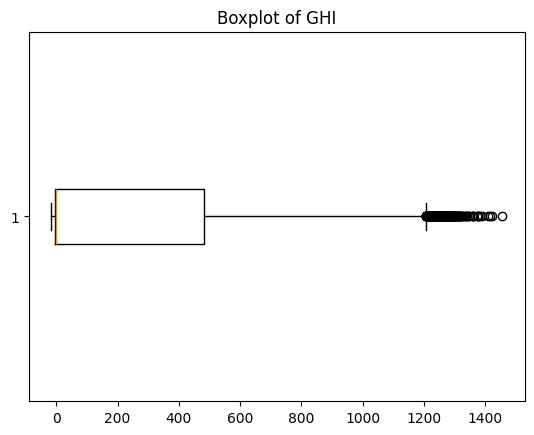

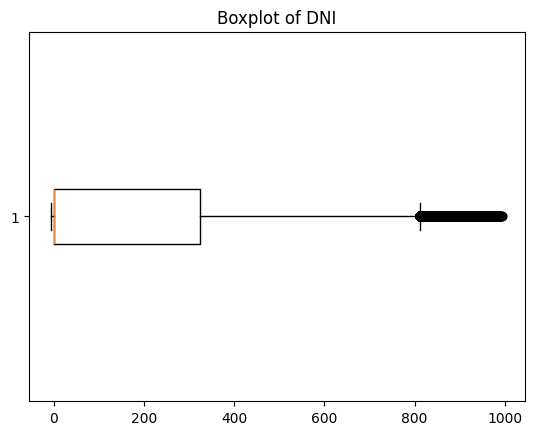

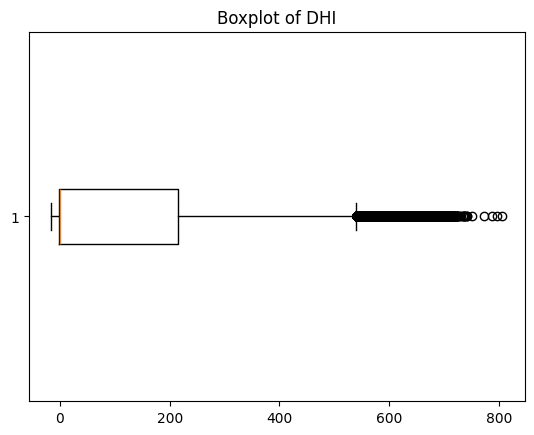

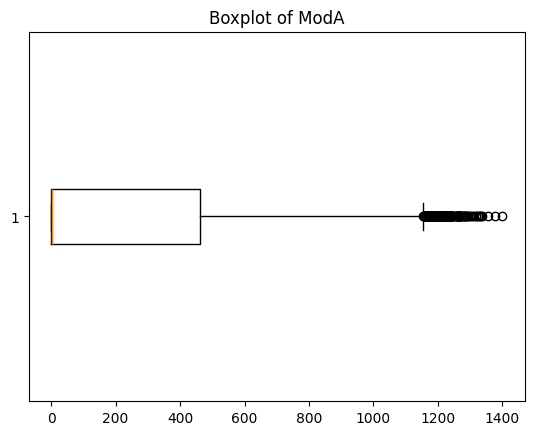

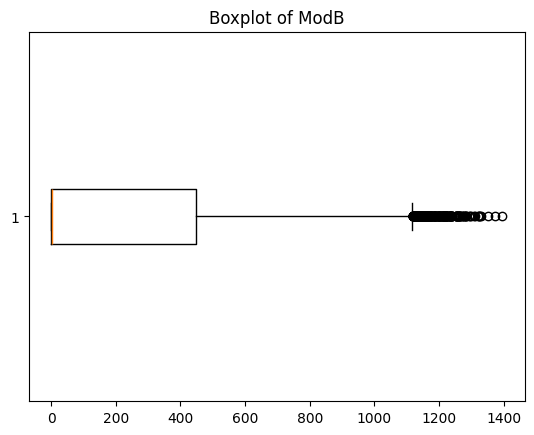

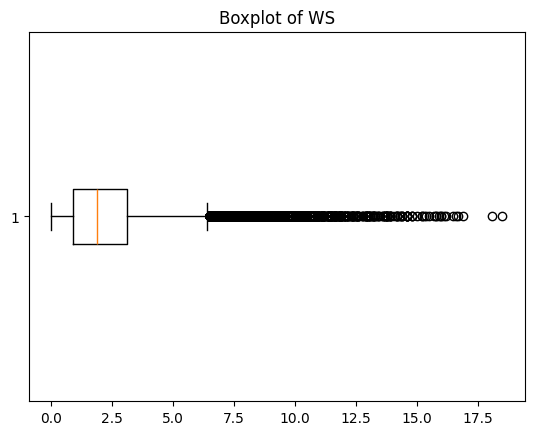

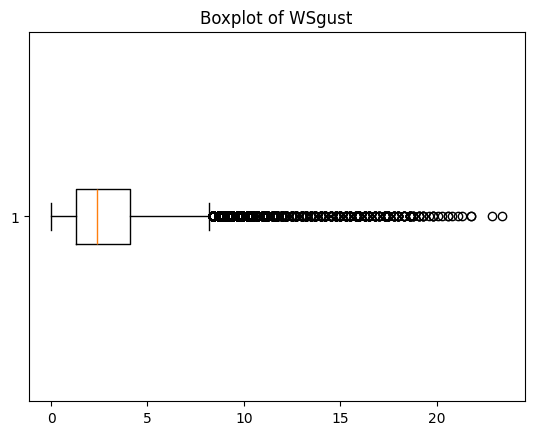

In [20]:
import matplotlib.pyplot as plt

# Make sure the columns are numeric
for col in ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Plot boxplots
for col in ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']:
    plt.figure()
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f'Boxplot of {str(col)}')
    plt.show()

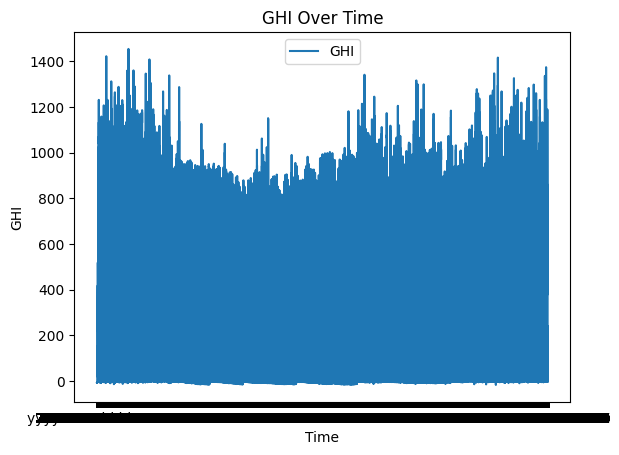

In [ ]:
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.figure()
    plt.plot(df['Timestamp'], df[col], label=col)
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.title(f'{col} Over Time')
    plt.legend()
    plt.show()


In [ ]:
cleaned = df[df['Cleaning'] == 1]
not_cleaned = df[df['Cleaning'] == 0]

# Compare sensor readings
impact_mod_a = cleaned['ModA'].mean() - not_cleaned['ModA'].mean()
impact_mod_b = cleaned['ModB'].mean() - not_cleaned['ModB'].mean()
print("Impact on ModA:", impact_mod_a)
print("Impact on ModB:", impact_mod_b)


In [ ]:
import seaborn as sns

correlation_matrix = df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'WS', 'WSgust', 'RH']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title('Wind Rose')
plt.show()


In [ ]:
sns.scatterplot(data=df, x='RH', y='Tamb', hue='GHI', size='DNI', sizes=(20, 200))
plt.title("RH vs Tamb with GHI and DNI")
plt.show()


In [ ]:
columns = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']
for col in columns:
    plt.figure()
    df[col].hist(bins=30, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.show()


In [ ]:
from scipy.stats import zscore

z_scores = df[['GHI', 'DNI', 'DHI']].apply(zscore)
outliers = (z_scores.abs() > 3).any(axis=1)
print("Number of outliers:", outliers.sum())


In [ ]:
plt.scatter(df['GHI'], df['Tamb'], s=df['RH'], alpha=0.5, c=df['WS'], cmap='viridis')
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.colorbar(label='Wind Speed')
plt.title('Bubble Chart: GHI vs Tamb vs WS')
plt.show()


In [ ]:
df.fillna(df.median(), inplace=True)  # Fill missing values
df = df[df[['GHI', 'DNI', 'DHI', 'ModA', 'ModB']] >= 0].dropna()  # Remove invalid values
df.drop(columns=['Comments'], inplace=True)  # Drop unnecessary column


In [ ]:
git add .
git commit -m "Completed EDA with cleaning and visualization"
git push origin task-1
